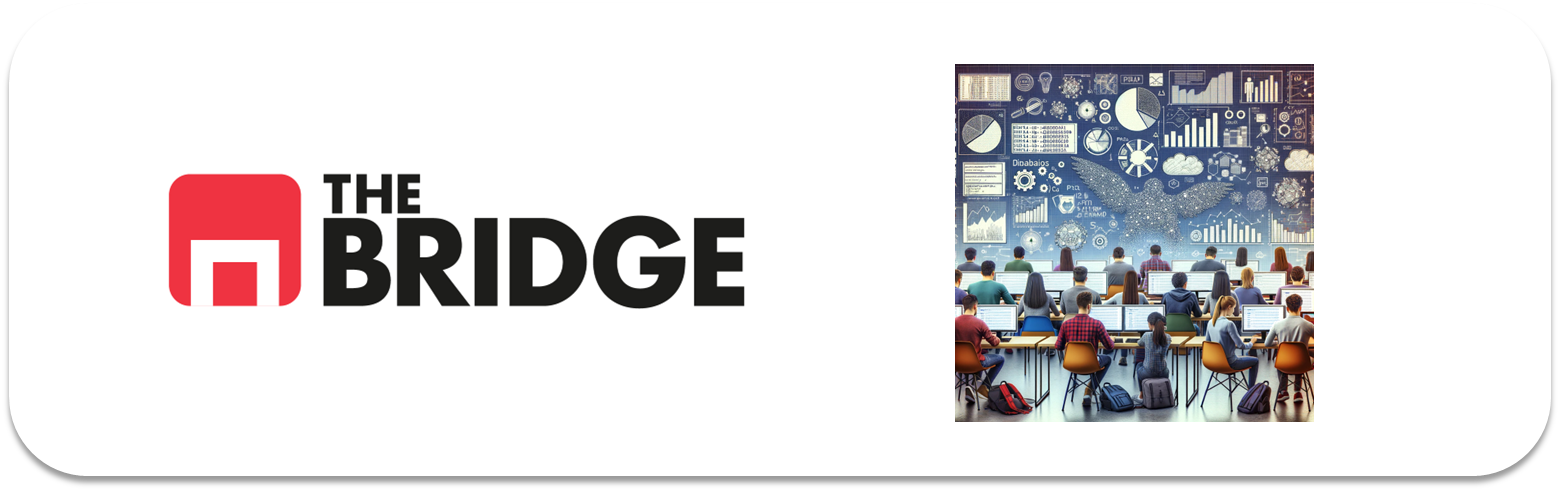

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



### DF E INFORMACION GENERAL

In [2]:
df=pd.read_csv('./data/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
target='survived'

Al ser una binaria su distribucion no es para nada normal

<Axes: xlabel='survived', ylabel='Count'>

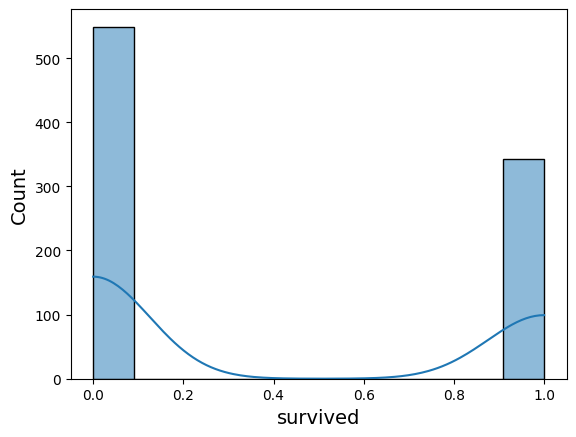

In [4]:
sns.histplot(x=target, data=df, kde= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### SPLIT X, Y E IMPUTACION DE MODA

In [43]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(df,test_size=0.2, random_state=42)

In [8]:
X_train=train_set.drop(target, axis=1)
y_train=train_set[target]
X_test=test_set.drop(target, axis=1)
y_test=test_set[target]

Asignamos la media a la edad, mientras que asignamos la moda a embarked

In [9]:
X_train= X_train.copy()

X_train['age']=X_train['age'].fillna(X_test['age'].mean())
X_test['age']=X_test['age'].fillna(X_test['age'].mean())

X_train['embarked_mod'] = X_train['embarked'].fillna(X_train['embarked'].mode()[0])
X_test['embarked_mod'] = X_test['embarked'].fillna(X_test['embarked'].mode()[0])

# Eliminar la columna 'deck' debido a la gran cantidad de nulos
if 'deck' in X_train.columns:
    X_train.drop('deck', axis=1, inplace=True)
if 'deck' in X_test.columns:
    X_test.drop('deck', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### MINI EDA


In [11]:
corr =train_set.corr(numeric_only= True)

In [12]:
corr_target = corr[target]
corr_target_abs = corr_target.apply(np.abs)

sorted_corr = corr_target_abs.sort_values(ascending=False)

In [13]:
print("Correlaciones absolutas con 'target' ordenadas:")
print(sorted_corr)

Correlaciones absolutas con 'target' ordenadas:
survived      1.000000
adult_male    0.555530
pclass        0.321750
fare          0.246641
alone         0.180542
parch         0.078311
age           0.059695
sibsp         0.047602
Name: survived, dtype: float64


In [14]:
criterio =0.18

In [15]:
features_num=corr_target_abs[corr_target_abs>criterio].index.to_list()
if target in features_num:
    features_num.remove(target)

# Filtrar X_train y X_test para conservar solo las columnas seleccionadas
X_train_filtered = X_train[features_num]
X_test_filtered = X_test[features_num]

features_num


['pclass', 'fare', 'adult_male', 'alone']

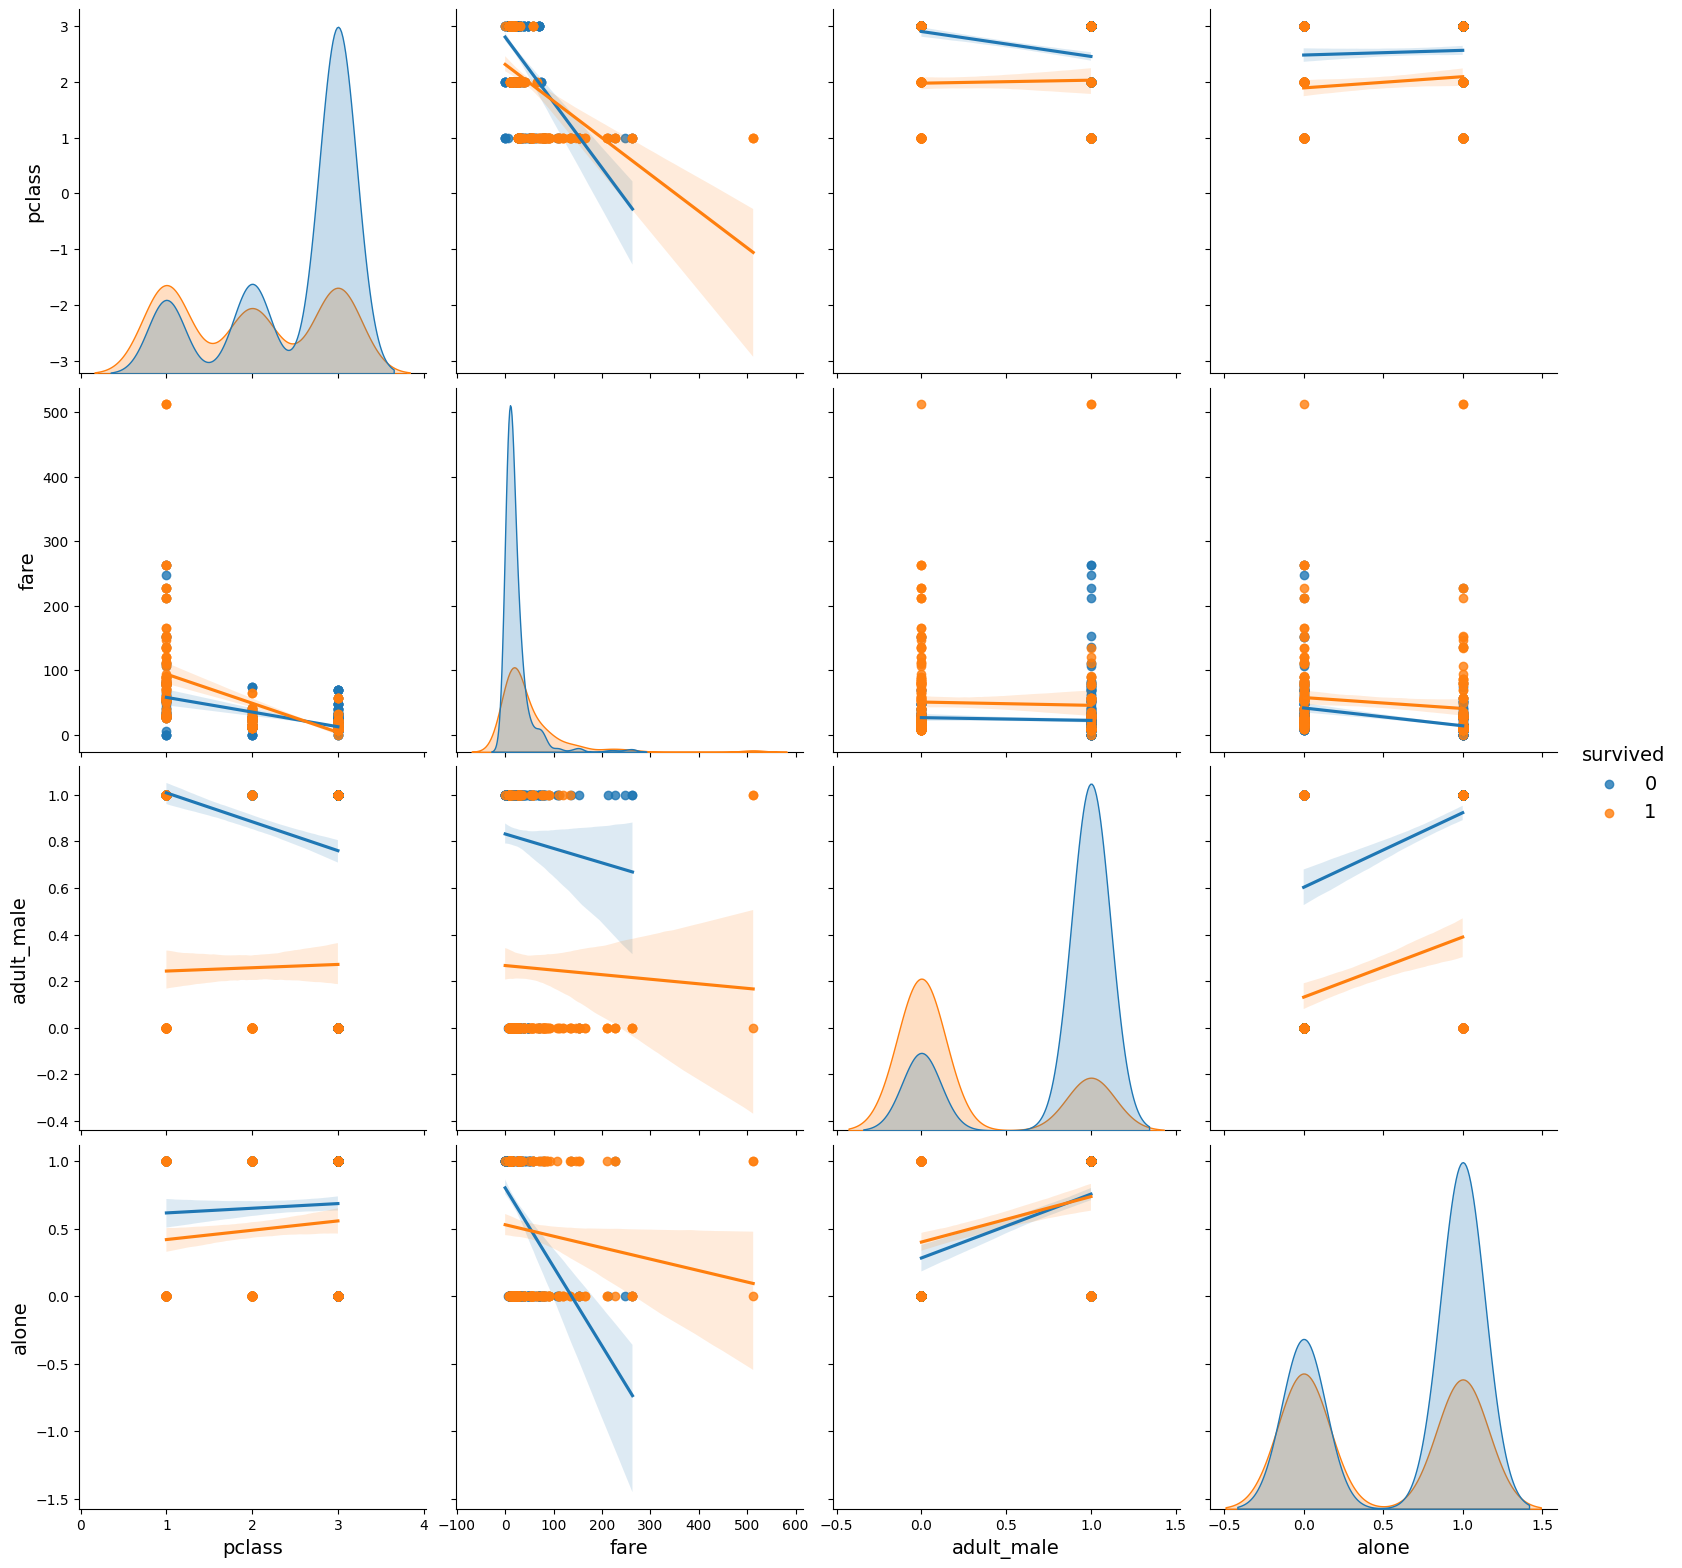

In [16]:
sns.pairplot(train_set,
            hue='survived',
            height=4,
            vars=['pclass', 'fare', 'adult_male', 'alone'],
            kind='reg'); # "reg" de regresión lineal

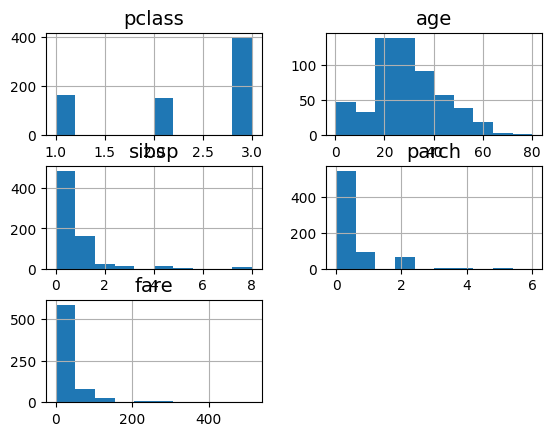

In [17]:
train_set.drop("survived", axis = 1).hist()
plt.show()

### TRANSFORMACION DE VARIABLES 

In [18]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
print(X_train['adult_male'].unique())
print(X_train['alone'].unique())

[ True False]
[ True False]


Intentaremos modificar las booleanas en 1 y ceros mientras que embarked la etiquetaremos en 1,2,3 para poder hacerla numerica, posteriormente las escalamos

In [20]:
X_train['adult_male'] = X_train['adult_male'].fillna(False).map({True: 1, False: 0})
X_test['adult_male'] = X_test['adult_male'].fillna(False).map({True: 1, False: 0})

X_train['alone'] = X_train['alone'].fillna(False).map({True: 1, False: 0})
X_test['alone'] = X_test['alone'].fillna(False).map({True: 1, False: 0})

# Mapear categorías de 'Embarked' a valores numéricos

mapping_embarked = {'S': 1, 'Q': 2, 'C': 3}
X_train['embarked'] = X_train['embarked'].map(mapping_embarked).fillna(0).astype(int)
X_test['embarked'] = X_test['embarked'].map(mapping_embarked).fillna(0).astype(int)




X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,embarked_mod
331,1,male,45.5,0,0,28.5000,1,First,man,1,Southampton,no,1,S
733,2,male,23.0,0,0,13.0000,1,Second,man,1,Southampton,no,1,S
382,3,male,32.0,0,0,7.9250,1,Third,man,1,Southampton,no,1,S
704,3,male,26.0,1,0,7.8542,1,Third,man,1,Southampton,no,0,S
813,3,female,6.0,4,2,31.2750,1,Third,child,0,Southampton,no,0,S


In [21]:
features = ['pclass', 'age', 'fare', 'adult_male', 'alone', 'embarked']  

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[features]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train[features]), columns = features)
X_test_scaled = pd.DataFrame(scaler.transform(X_train[features]), columns= features)
X_train_scaled.describe()

,pclass,age,fare,adult_male,alone,embarked
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,9.355812e-17,9.792417e-17,5.363999e-17,-1.821265e-16,1.047851e-16,-8.981580e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.614136e+00,-2.253566e+00,-6.274674e-01,-1.242118e+00,-1.231219e+00,-1.846082e+00
25%,-4.005512e-01,-5.924601e-01,-4.748670e-01,-1.242118e+00,-1.231219e+00,-5.574444e-01
50%,8.130337e-01,6.227174e-02,-3.491435e-01,8.050765e-01,8.122030e-01,-5.574444e-01
75%,8.130337e-01,4.082064e-01,-4.017244e-02,8.050765e-01,8.122030e-01,7.311933e-01
max,8.130337e-01,3.872052e+00,9.237724e+00,8.050765e-01,8.122030e-01,2.019831e+00


### MODELO DE REGRESION LOGISTICA

In [23]:
print(X_train.dtypes)

pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked          int64
class            object
who              object
adult_male        int64
embark_town      object
alive            object
alone             int64
embarked_mod     object
dtype: object


Observo los tipos por que el modelo no proceso objetos y no los he eliminado todavia

In [24]:
print(y_train.dtypes)

int64


In [25]:
columns_to_drop = ['sex', 'class', 'who', 'embark_town', 'alive', 'embarked_mod']

# Eliminar esas columnas de los conjuntos de entrenamiento y prueba
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Verificar que se han eliminado correctamente
print(X_train.head())

     pclass   age  sibsp  parch     fare  embarked  adult_male  alone
331       1  45.5      0      0  28.5000         1           1      1
733       2  23.0      0      0  13.0000         1           1      1
382       3  32.0      0      0   7.9250         1           1      1
704       3  26.0      1      0   7.8542         1           1      0
813       3   6.0      4      2  31.2750         1           0      0


In [26]:
y_train = train_set["survived"]
y_test = test_set["survived"]

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 5000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

### EVALUACION DEL MODELO

Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.

In [28]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-0.84803576 -0.0101438  -0.57736304 -0.35795209  0.00333336  0.17912474
  -2.97487156 -0.5134084 ]]
[3.77522367]
[0 1]


In [29]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
adult_male,2.974872
pclass,0.848036
sibsp,0.577363
alone,0.513408
parch,0.357952


In [30]:
log_reg.predict(X_train)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [31]:
log_reg.predict_proba(X_train)

array([[0.67885381, 0.32114619],
       [0.80533477, 0.19466523],
       [0.91499617, 0.08500383],
       ...,
       [0.95640438, 0.04359562],
       [0.11194403, 0.88805597],
       [0.5453509 , 0.4546491 ]])

En este caso calculamos la accuracy, de momento las predicciones son correctas

In [32]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, log_reg.predict(X_train))
print(acc_train)

0.8286516853932584


In [33]:
from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.83916084 0.82517483 0.82394366 0.79577465 0.83802817]
Logistic Regression: 0.824416 (0.015645)


In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [39]:
y_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)

In [40]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in log_reg.classes_], 
                  columns=[f"Predicho {i}" for i in log_reg.classes_])

cm

,Predicho 0,Predicho 1
Real 0,91,14
Real 1,19,55


Conclusión: El modelo es bueno prediciendo tanto las personas que no sobrevivieron (alta precisión), pero tiene dificultades para identificar a los supervivientes. Hay margen de mejora en la identificación de supervivientes (falsos negativos).

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predicciones
y_pred = log_reg.predict(X_test)

# Calcular el Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcular Precision
precision = precision_score(y_test, y_pred)

# Calcular Recall
recall = recall_score(y_test, y_pred)

# Calcular F1-Score
f1 = f1_score(y_test, y_pred)

# Imprimir resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8156
Precision: 0.7971
Recall: 0.7432
F1-Score: 0.7692


In [41]:

micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.8156424581005587
MACRO PRECISION: 0.8121870882740447
MICRO RECALL: 0.8156424581005587
MACRO RECALL: 0.804954954954955
MICRO ACCURACY: 0.8156424581005587


* El modelo está logrando una precisión y recall decentes, pero hay espacio para mejorar, especialmente en la identificación de los supervivientes. El recall de 0.74 sugiere que el modelo pierde algunos casos positivos (supervivientes).
* F1-Score de 0.76 indica que el modelo está equilibrando bastante bien la precisión y el recall, pero no de forma perfecta.
* Las métricas de precision y recall muestran que el modelo tiende a predecir más correctamente las personas que no sobrevivieron, pero tiene más dificultades para identificar a los que sí sobrevivieron.
* Micro y Macro precisions y recalls indican un rendimiento equilibrado, pero también que se pueden ajustar para mejorar el rendimiento en la clase minoritaria (los supervivientes).

### CONCLUSION

La evaluación mostró que el modelo tiene una precisión de 81%, con un recall de 74%, lo que indica que el modelo tiene dificultades para identificar correctamente a algunos supervivientes. Aunque tiene un buen desempeño en términos generales, se puede mejorar en cuanto a la identificación de los casos positivos (supervivientes).


El modelo de regresión logística es útil para predecir la supervivencia de los pasajeros del Titanic, con un rendimiento bastante sólido, pero con margen de mejora, especialmente en la detección de los supervivientes. Se recomienda ajustar el umbral de decisión y probar técnicas de balanceo de clases para mejorar el recall y, por lo tanto, la capacidad de detectar a más supervivientes.